In [1]:
import imageio as igio
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def my_fun( filename='frame0.jpg', method='1' ):
    im_read =igio.imread(filename)
    channel = 0
    
    plt.figure(figsize = (10,10))
    plt.imshow(im_read[:,:,channel], cmap = plt.get_cmap(name = 'gray'))
    plt.colorbar()
    
    if( method == 1 ):
        im_read =igio.imread(filename)
        print('Limearization')
        im_shape = im_read.shape
        im_size = im_shape[0]*im_shape[1]
        
        counter = np.zeros([1,2])
        counter[0,0] = 0
        counter[0,1] = im_size
        
        T_i = 125
        T = 0
        c = 0
        
        channel = 0
        while( np.abs(T_i - T) > 0.5 ):
            print(str(T_i) + ' - ' + str(T))
            im_read =igio.imread(filename)
            im = im_read
            counter = np.zeros([1,2])
            counter_pix = np.zeros([1,2])
            for i in range(1,im_shape[0]):
                for j in range(1,im_shape[1]):
                    if( im[i,j] <= T ):
                        counter_pix[0,0] += im[i,j]
                        im[i,j] = 0
                        counter[0,0] += 1
                    else:
                        counter_pix[0,1] += im[i,j]
                        im[i,j] = 1
                        counter[0,1] += 1
            
            G1 = counter_pix[0,0] / counter[0,0]
            G2 = counter_pix[0,1] / counter[0,1]
            T = T_i
            T_i = 0.5*(G1+G2)
            print(str(T_i) + ' * ' + str(T))
            
            print( str(G1) + ' ' + str(G2), end = '\n' )
            plt.figure(figsize = (10,10))
            plt.imshow(im[:,:]*255, cmap = plt.get_cmap(name = 'gray'))
            plt.colorbar()
            
            c += 1
    
    if( method == 2 ):
        im = im_read
        im_shape = im_read.shape
        print(im_shape)
        
        im_vector = np.zeros([1,im_shape[0]*im_shape[1]]) #vectorized of original image
        im_vector1 = np.zeros([1,im_shape[0]*im_shape[1]]) #temporal
        print(im_shape[0]*im_shape[1])
        
        im_vector2 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #vectorized of original image with pos -1 +1 
        im_vector3 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #temporal
        print(im_shape[0]*im_shape[1]+2)
        
        im_vector3[0,0] = im_read[im_shape[0]-1,im_shape[1]-1,channel] 
        im_vector3[0,im_shape[0]*im_shape[1]+2 - 1] = im_read[0,0,channel]
        
        idx = 0
        for i in range(0,im_shape[0]):
            for j in range(0,im_shape[1]):
                im_vector[0,idx] = im_read[i,j,channel]
                idx += 1
                
        print(im_vector)
        im_vector3[0,1:im_shape[0]*im_shape[1]+1] = im_vector[0,:]
#         print(im_vector3)
                    
        filter = [0.5,0.3,0.2]
        print(filter)
        
        for i in range(1,im_shape[0]*im_shape[1]+2-1):
            im_vector2[0,i-1] = im_vector3[0,i-1] * filter[0] + im_vector3[0,i] * filter[1] + im_vector3[0,i+1] * filter[2]
#             print( str(im_vector3[0,i-1])+'*'+str(filter[0])+' + '+str(im_vector3[0,i])+'*'+str(filter[1])+' + '+str(im_vector3[0,i+1])+'*'+str(filter[2])+' = '+str(im_vector2[0,i-1]))
#         print(im_vector2)
        
        idx = 0
        for i in range(0,im_shape[0]):
            for j in range(0,im_shape[1]):
                im_read[i,j,channel] = im_vector2[0,idx]
                idx += 1
               
        plt.figure(figsize = (10,10))
        plt.imshow(im_read[:,:,channel], cmap = plt.get_cmap(name = 'gray'))
        plt.colorbar()

In [ ]:
my_fun(method=2)

In [2]:
I = [[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18],[19,20,21,22,23,24],[25,26,27,28,29,30],[31,32,33,34,35,36]]
print(I)
II = np.zeros([6,6])
print(II)
II = np.array(I)
print(II)

[[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18], [19, 20, 21, 22, 23, 24], [25, 26, 27, 28, 29, 30], [31, 32, 33, 34, 35, 36]]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]]


In [3]:
w = [[-1,-1,-1],[0,0,0],[1,1,1]]
ww = np.zeros([3,3])
print(w)
ww = np.array(w)
print(ww)

[[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [4]:
III = np.zeros([ II.shape[0]+2, II.shape[1]+2])
print(III)
III[0,1:III.shape[1]-1] = II[0,:]
III[III.shape[0]-1,1:III.shape[1]-1] = II[II.shape[1]-1,:]

III[1:III.shape[0]-1,0] = II[:,0]
III[1:III.shape[0]-1,III.shape[1]-1] = II[:,II.shape[1]-1]

III[0,0] = II[0,0]
III[III.shape[0]-1,0] = II[II.shape[0]-1,0]
III[0,III.shape[1]-1] = II[0,II.shape[1]-1]
III[III.shape[0]-1,III.shape[1]-1] = II[II.shape[1]-1,II.shape[1]-1]

III[1:III.shape[0]-1,1:III.shape[1]-1] = II[0:II.shape[0],0:II.shape[1]]

print(III)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 1.  1.  2.  3.  4.  5.  6.  6.]
 [ 1.  1.  2.  3.  4.  5.  6.  6.]
 [ 7.  7.  8.  9. 10. 11. 12. 12.]
 [13. 13. 14. 15. 16. 17. 18. 18.]
 [19. 19. 20. 21. 22. 23. 24. 24.]
 [25. 25. 26. 27. 28. 29. 30. 30.]
 [31. 31. 32. 33. 34. 35. 36. 36.]
 [31. 31. 32. 33. 34. 35. 36. 36.]]


[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]]
[[18 18 18 18 18 18]
 [36 36 36 36 36 36]
 [36 36 36 36 36 36]
 [36 36 36 36 36 36]
 [36 36 36 36 36 36]
 [18 18 18 18 18 18]]


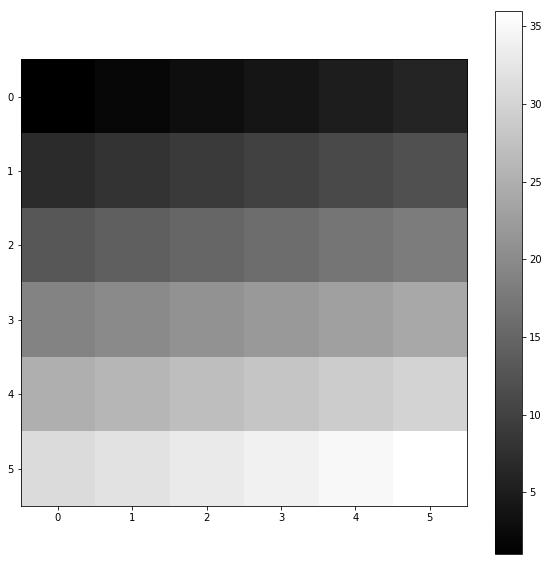

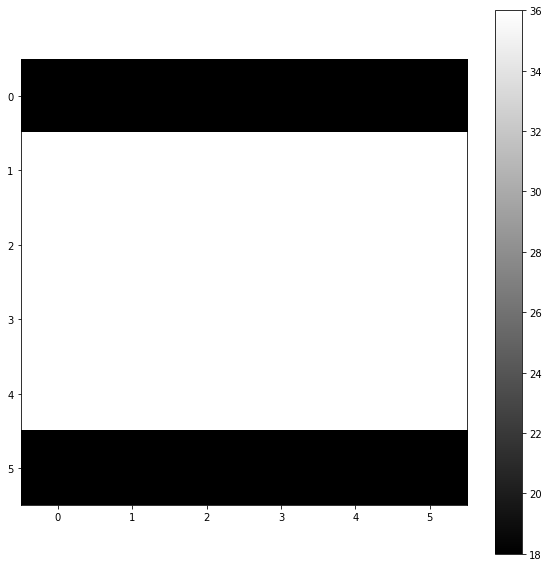

In [16]:
II = np.array(I)
II_c = np.array(II)
print(II_c)

plt.figure(figsize = (10,10))
plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
plt.colorbar()

for i in range(1,III.shape[0]-1):
    for j in range(1,III.shape[1]-1):
        c = 0
        i_x = i - 1 
        for x in range(0,ww.shape[0]):
            i_y = j - 1
            for y in range(0,ww.shape[1]):
                c += ww[x,y] * III[i_x,i_y]
#                 print(str(ww[x,y]) + ' ' + str(III[i_x,i_y]))
                i_y += 1
            i_x += 1
        II_c[i-1,j-1] = c
print(II_c)

plt.figure(figsize = (10,10))
plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
plt.colorbar()       